In [57]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install tabulate

In [61]:
import random
from datasets import load_dataset, DatasetDict
import pandas as pd
from tabulate import tabulate

# **Dataset #1: MathSAT**

In [62]:
random.seed(42)

ds = load_dataset("ndavidson/sat-math-chain-of-thought")["train"]

df = ds.to_pandas()

pd.set_option('display.width', 200)
pd.set_option('display.colheader_justify', 'center')

print(tabulate(df.head(5), headers='keys', tablefmt='fancy_grid', showindex=False))
print("")
print(df.head(5))

╒═════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════╤══════════════╕
│ id          │ question                                                                                                                                                                                                                                                                           │ reasoning_chain         

In [69]:
print(df['answer'].value_counts())
print((df['answer'] == 'A').sum())

answer
3                                                                                                             76
4                                                                                                             70
6                                                                                                             61
5                                                                                                             58
2                                                                                                             53
                                                                                                              ..
The ratio of their combined age to Josh's age when they married is 5:1.                                        1
The ratio of the slices Dean ate from the Hawaiian pizza to the total slices of the Hawaiian pizza is 1:2.     1
Josh was 22 years old when they got married.                                             

In [66]:
print(df['is_correct'].value_counts())

is_correct
True     32494
False      587
Name: count, dtype: int64


In [67]:
duplicate_count = df['id'].duplicated().sum()
print(f'Number of duplicate "id" entries: {duplicate_count}')

Number of duplicate "id" entries: 1190


# **Dataset #2: Math Competition**
  

In [53]:
import pandas as pd
from tabulate import tabulate

pd.set_option('display.width', 200)
pd.set_option('display.colheader_justify', 'center')

splits = {'train': 'numeric/train-00000-of-00001.parquet', 'test': 'numeric/test-00000-of-00001.parquet'}
df_train = pd.read_parquet("hf://datasets/jeggers/competition_math/" + splits["train"])
df_test = pd.read_parquet("hf://datasets/jeggers/competition_math/" + splits["test"])

print(tabulate(df_train.head(5), headers='keys', tablefmt='fancy_grid', showindex=False))
print("")
print(df_train.head(5))

╒═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════╤═════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

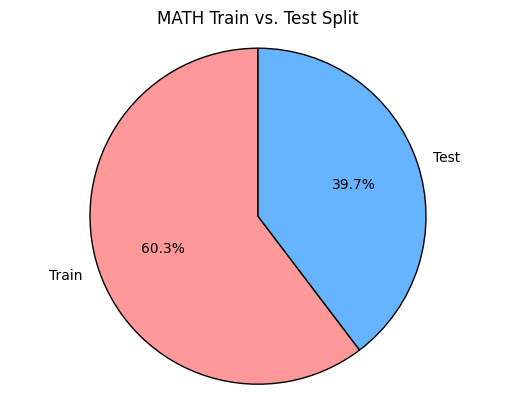

In [23]:
import matplotlib.pyplot as plt

#print(f"There are {len(df_train)+len(df_test)} total questions and answers")
#print("")
#print(f"There are {len(df_train)} training questions and answers")
#print(f"There are {len(df_test)} testing questions and answers")

labels = ['Train', 'Test']
sizes = [len(df_train), len(df_test)]

colors = ['#ff9999', '#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title('MATH Train vs. Test Split')

plt.show()

MATH Dataset Analysis based on level types

level
Level 5    1469
Level 3    1018
Level 4    1006
Level 2     930
Level 1     441
Level ?       2
Name: count, dtype: int64
level
Level 4    771
Level 5    749
Level 3    740
Level 2    607
Level 1    332
Name: count, dtype: int64



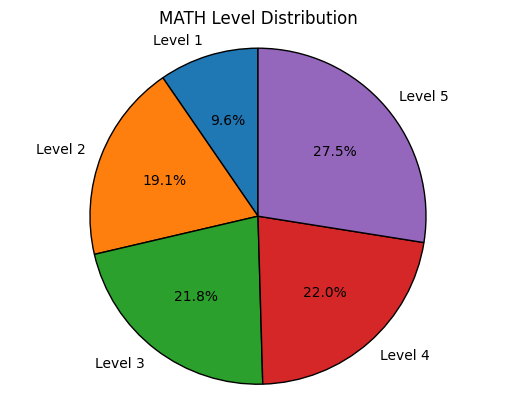

In [33]:
print(df_train['level'].value_counts())
print(df_test['level'].value_counts())
print("")

level_1 = (df_train['level'] == 'Level 1').sum() + (df_test['level'] == 'Level 1').sum()
level_2 = (df_train['level'] == 'Level 2').sum() + (df_test['level'] == 'Level 2').sum()
level_3 = (df_train['level'] == 'Level 3').sum() + (df_test['level'] == 'Level 3').sum()
level_4 = (df_train['level'] == 'Level 4').sum() + (df_test['level'] == 'Level 4').sum()
level_5 = (df_train['level'] == 'Level 5').sum() + (df_test['level'] == 'Level 5').sum()

labels = ['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']
sizes = [level_1, level_2, level_3, level_4, level_5]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title('MATH Level Distribution')

plt.show()

MATH Dataset Analysis based on question types

type
Algebra                   1255
Prealgebra                 875
Number Theory              818
Intermediate Algebra       682
Geometry                   510
Counting & Probability     502
Precalculus                224
Name: count, dtype: int64
type
Algebra                   881
Prealgebra                636
Intermediate Algebra      503
Number Theory             495
Counting & Probability    291
Geometry                  237
Precalculus               156
Name: count, dtype: int64



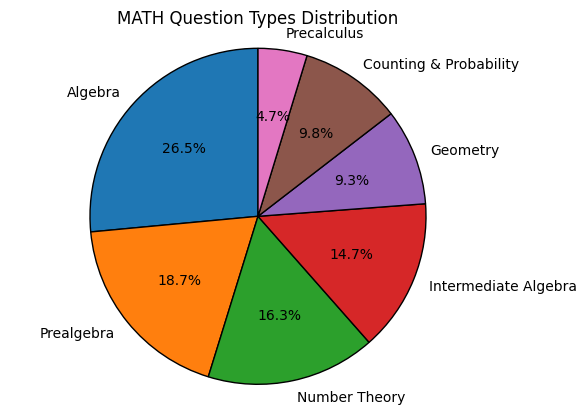

In [34]:
print(df_train['type'].value_counts())
print(df_test['type'].value_counts())
print("")

algebra = (df_train['type'] == 'Algebra').sum() + (df_test['type'] == 'Algebra').sum()
prealgebra = (df_train['type'] == 'Prealgebra').sum() + (df_test['type'] == 'Prealgebra').sum()
number_theory = (df_train['type'] == 'Number Theory').sum() + (df_test['type'] == 'Number Theory').sum()
intermediate_algebra = (df_train['type'] == 'Intermediate Algebra').sum() + (df_test['type'] == 'Intermediate Algebra').sum()
geometry = (df_train['type'] == 'Geometry').sum() + (df_test['type'] == 'Geometry').sum()
counting_probability = (df_train['type'] == 'Counting & Probability').sum() + (df_test['type'] == 'Counting & Probability').sum()
precalculus = (df_train['type'] == 'Precalculus').sum() + (df_test['type'] == 'Precalculus').sum()

labels = ['Algebra', 'Prealgebra', 'Number Theory', 'Intermediate Algebra', 'Geometry', 'Counting & Probability', 'Precalculus']
sizes = [algebra, prealgebra, number_theory, intermediate_algebra, geometry, counting_probability, precalculus]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title('MATH Question Types Distribution')

plt.show()

MATH Dataset Chart for both level and type

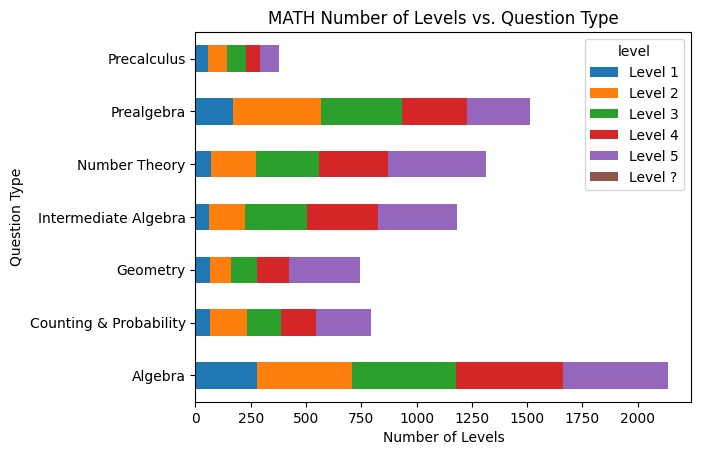

In [49]:
types = ['Algebra', 'Prealgebra', 'Number Theory', 'Intermediate Algebra', 'Geometry', 'Counting & Probability', 'Precalculus']
levels = ['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']

count_data = df_train.groupby(['type', 'level']).size().unstack(fill_value=0) + df_test.groupby(['type', 'level']).size().unstack(fill_value=0)
count_data.plot(kind='barh', stacked=True)

plt.title('MATH Number of Levels vs. Question Type')
plt.xlabel('Number of Levels')
plt.ylabel('Question Type')

plt.show()